**Lab 1 Part 2**


Q1

In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [3]:
# Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

In [4]:
# Insertion Sort
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [5]:
# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [6]:
# Quick Sort
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

In [17]:
# Bucket Sort
def bucket_sort(arr):
    buckets = [[] for _ in range(10)]
    for num in arr:
        index = num // 1000
        buckets[index].append(num)
    sorted_arr = []
    for bucket in buckets:
        sorted_arr.extend(sorted(bucket))
    return sorted_arr


In [9]:
# Heap Sort
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

In [10]:
# Radix Sort
def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    i = 0
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

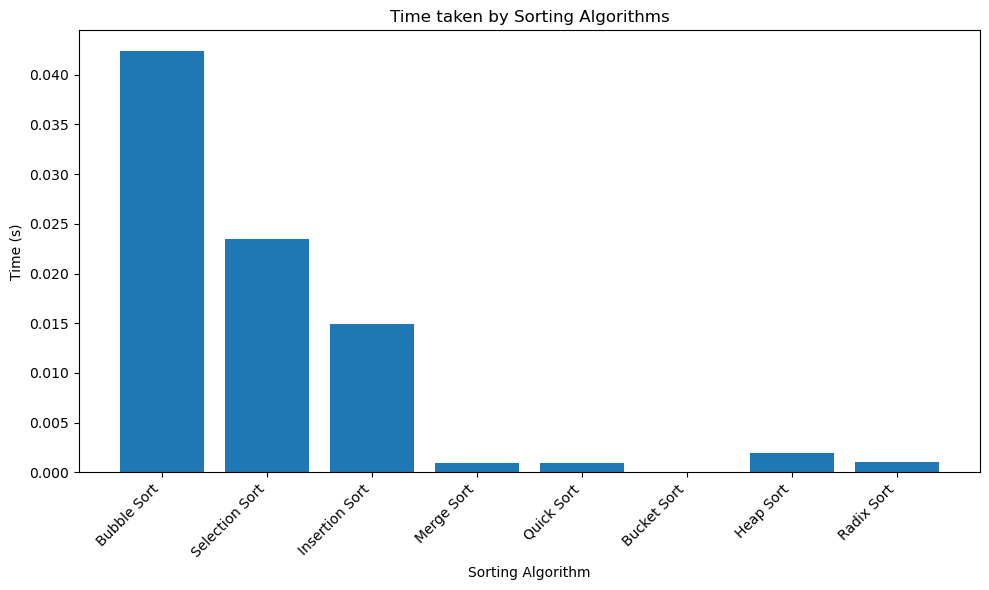

In [18]:
random_numbers = [random.randint(1, 10000) for _ in range(1000)]
sorting_algorithms = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": lambda arr: quick_sort(arr, 0, len(arr) - 1),
    "Bucket Sort": bucket_sort,
    "Heap Sort": heap_sort,
    "Radix Sort": radix_sort
}

execution_times = {}
for algorithm_name, algorithm in sorting_algorithms.items():
    arr_copy = random_numbers.copy()
    start_time = time.time()
    algorithm(arr_copy)
    end_time = time.time()
    execution_times[algorithm_name] = end_time - start_time


plt.figure(figsize=(10, 6))
plt.bar(execution_times.keys(), execution_times.values())
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (s)')
plt.title('Time taken by Sorting Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q2

In [21]:
import heapq

def merge_sorted_lists(lists):
    merged_list = []
    heap = []

   
    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))

    while heap:
        val, lst_index, elem_index = heapq.heappop(heap)
        merged_list.append(val)

        
        if elem_index + 1 < len(lists[lst_index]):
            heapq.heappush(heap, (lists[lst_index][elem_index + 1], lst_index, elem_index + 1))

    return merged_list


m = 3 
n = 5 

# Generating sample sorted lists
sorted_lists = []
for _ in range(m):
    sorted_lists.append(sorted(random.sample(range(1, 100), n)))

print("Sorted Lists:")
for lst in sorted_lists:
    print(lst)

print("\nMerged and Sorted List:")
result = merge_sorted_lists(sorted_lists)
print(result)


Sorted Lists:
[10, 19, 20, 38, 92]
[54, 55, 62, 66, 91]
[19, 20, 36, 42, 92]

Merged and Sorted List:
[10, 19, 19, 20, 20, 36, 38, 42, 54, 55, 62, 66, 91, 92, 92]


Q3

In [24]:
import heapq
import random
def find_k_largest_elements(nums, k):
    heap = []
    for num in nums:
        if len(heap) < k:
            heapq.heappush(heap, num)
        else:
            if num > heap[0]:
                heapq.heappop(heap)
                heapq.heappush(heap, num)
    return heap

N = int(input("Enter the size of the array: "))
arr = [random.randint(1, 100) for _ in range(N)]
print("Generated array:", arr)
K = int(input("Enter the value of K (number of largest elements to find): "))
result = find_k_largest_elements(arr, K)
print(f"The {K} largest elements in the array are:", result)


Enter the size of the array: 20
Generated array: [59, 45, 48, 89, 99, 26, 56, 55, 26, 48, 50, 36, 21, 42, 34, 74, 52, 82, 57, 100]
Enter the value of K (number of largest elements to find): 4
The 4 largest elements in the array are: [82, 99, 89, 100]


Q4

In [27]:
def activity_selection(activities):
    # Sort activities based on finishing time
    activities.sort(key=lambda x: x[1])
    selected_activities = []
    prev_finish_time = float('-inf')
    for activity in activities:
        start, finish = activity
        if start >= prev_finish_time:
            selected_activities.append(activity)
            prev_finish_time = finish
    return selected_activities

activities = [(1, 3), (2, 5), (3, 8), (4, 6), (5, 9), (7, 10), (8, 11)]
selected = activity_selection(activities)
print("Maximum number of activities performed:", len(selected))
print("Executed activities:", selected)


Maximum number of activities performed: 3
Executed activities: [(1, 3), (4, 6), (7, 10)]


Q5

In [31]:
def merge_intervals(intervals):
    if not intervals:
        return []
    intervals.sort(key=lambda x: x[0])
    merged_intervals = [intervals[0]]
    for interval in intervals[1:]:
        if interval[0] <= merged_intervals[-1][1]:  # Overlapping intervals
            merged_intervals[-1] = (merged_intervals[-1][0], max(merged_intervals[-1][1], interval[1]))
        else:
            merged_intervals.append(interval)
    return merged_intervals

intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]
non_overlapping_intervals = merge_intervals(intervals)
print("Non-overlapping intervals after merging:")
for interval in non_overlapping_intervals:
    print(interval)

Non-overlapping intervals after merging:
(1, 5)
(6, 9)
